In [73]:
# Process all test images in order to find the a good color space and thresholds
import cv2
import glob
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Plot all graphical outputs inline
%matplotlib inline


test_image_files = glob.glob('./test_images/*')

test_images = []

for file in test_image_files:
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    test_images.append(img)
    
    
print('Imgaes loaded')

Imgaes loaded


In [74]:
# Undistort the images
dist_pickle = pickle.load(open("./camera_cal/calibration_coefficients.p", "rb"))
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

undistorted_images = []

for img in test_images:
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    undistorted_images.append(undist)

    
print('Images undistorted')

Images undistorted


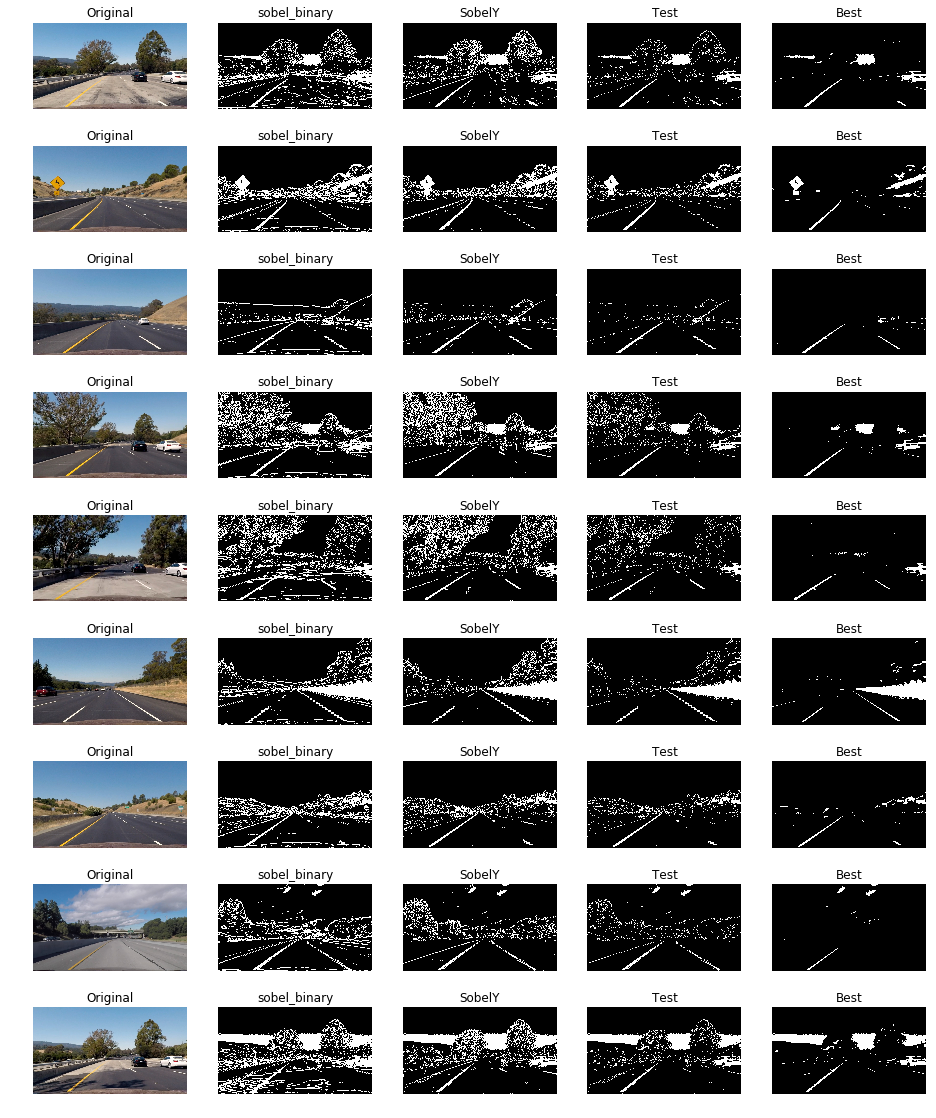

In [75]:
from Binarizer import Binarizer
binarizer = Binarizer()

fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(20)

for index, img in enumerate(undistorted_images): 
    # Check various threshold values
    yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    Y = yuv[:, :, 0]
    U = yuv[:, :, 1]
    V = yuv[:, :, 2]

    Y_binary = np.zeros_like(Y)
    Y_binary[(Y >= 200) & (Y <= 255)] = 1

    U_binary = np.zeros_like(U)
    U_binary[(U >= 200) & (U <= 255)] = 1

    V_binary = np.zeros_like(V)
    V_binary[(V >= 0) & (V <= 100)] = 1
    
    
    sobelx = cv2.Sobel(Y, cv2.CV_64F, 1, 0, ksize=13)
    sobely = cv2.Sobel(Y, cv2.CV_64F, 0, 1, ksize=13)
    
    abs_sobel_x = np.absolute(sobelx)
    scaled_sobel_x = np.uint8(255 * abs_sobel_x / np.max(abs_sobel_x))

    sobel_binary = np.zeros_like(scaled_sobel_x)
    sobel_binary[(scaled_sobel_x >= 20) & (scaled_sobel_x <= 100)] = 1
    
    
    abs_sobel_y = np.absolute(sobely)
    scaled_sobel_y = np.uint8(255 * abs_sobel_y / np.max(abs_sobel_y))

    sobel_binary_y = np.zeros_like(scaled_sobel_y)
    sobel_binary_y[(scaled_sobel_y >= 20) & (scaled_sobel_y <= 100)] = 1
    
    test = np.zeros_like(Y)
    test[(sobel_binary_y == 1) & (sobel_binary == 1) | (Y_binary == 1) | (V_binary == 1)] = 1
    
    test2 = np.zeros_like(Y)
    test2[(sobel_binary_y == 1) | (Y_binary == 1) | (V_binary == 1)] = 1
    
    test3 = np.zeros_like(Y)
    test3[(sobel_binary == 1) | (Y_binary == 1) | (V_binary == 1)] = 1
    
    combined = np.zeros_like(Y)
    combined[(Y_binary == 1) | (V_binary == 1)] = 1
    
    
    
    plot_index = index * 5
    ax = fig.add_subplot(9, 5, plot_index + 1)
    ax.imshow(img)
    ax.axis('off')
    plt.title('Original')

    ax = fig.add_subplot(9, 5, plot_index + 2)
    ax.imshow(test2, cmap='gray')
    ax.axis('off')
    plt.title('sobel_binary')
    
    ax = fig.add_subplot(9, 5, plot_index + 3)
    ax.imshow(test3, cmap='gray')
    ax.axis('off')
    plt.title('SobelY')
    
    ax = fig.add_subplot(9, 5, plot_index + 4)
    ax.imshow(test, cmap='gray')
    ax.axis('off')
    plt.title('Test')
    
    ax = fig.add_subplot(9, 5, plot_index + 5)
    ax.imshow(combined, cmap='gray')
    ax.axis('off')
    plt.title('Best')
    

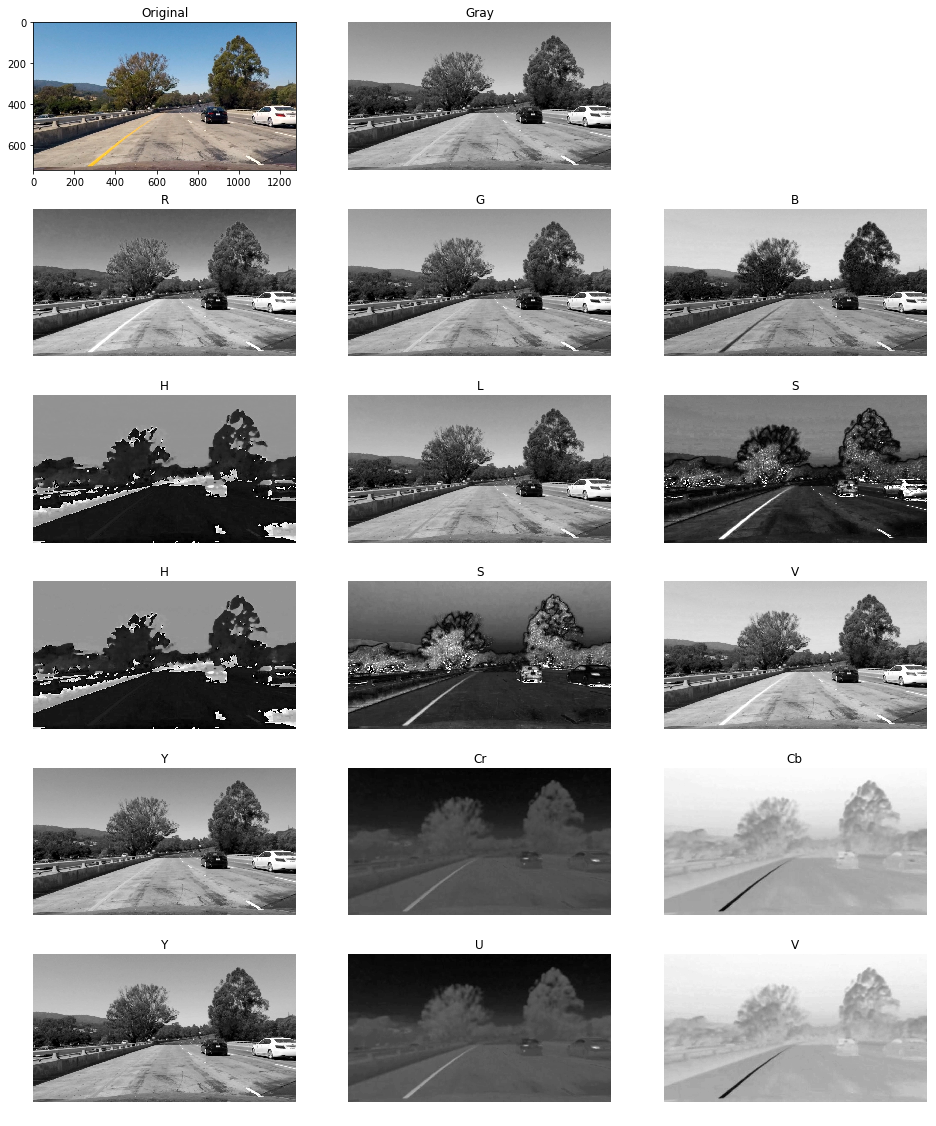

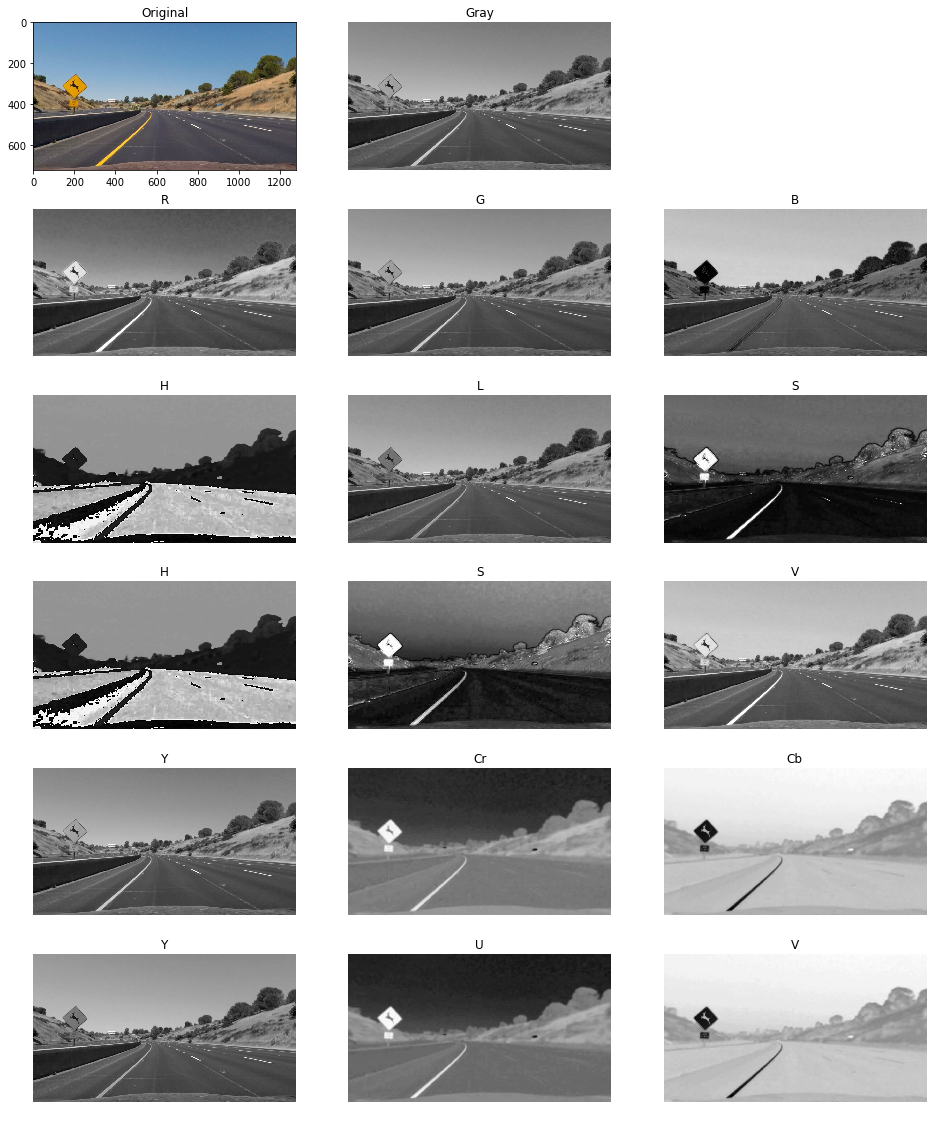

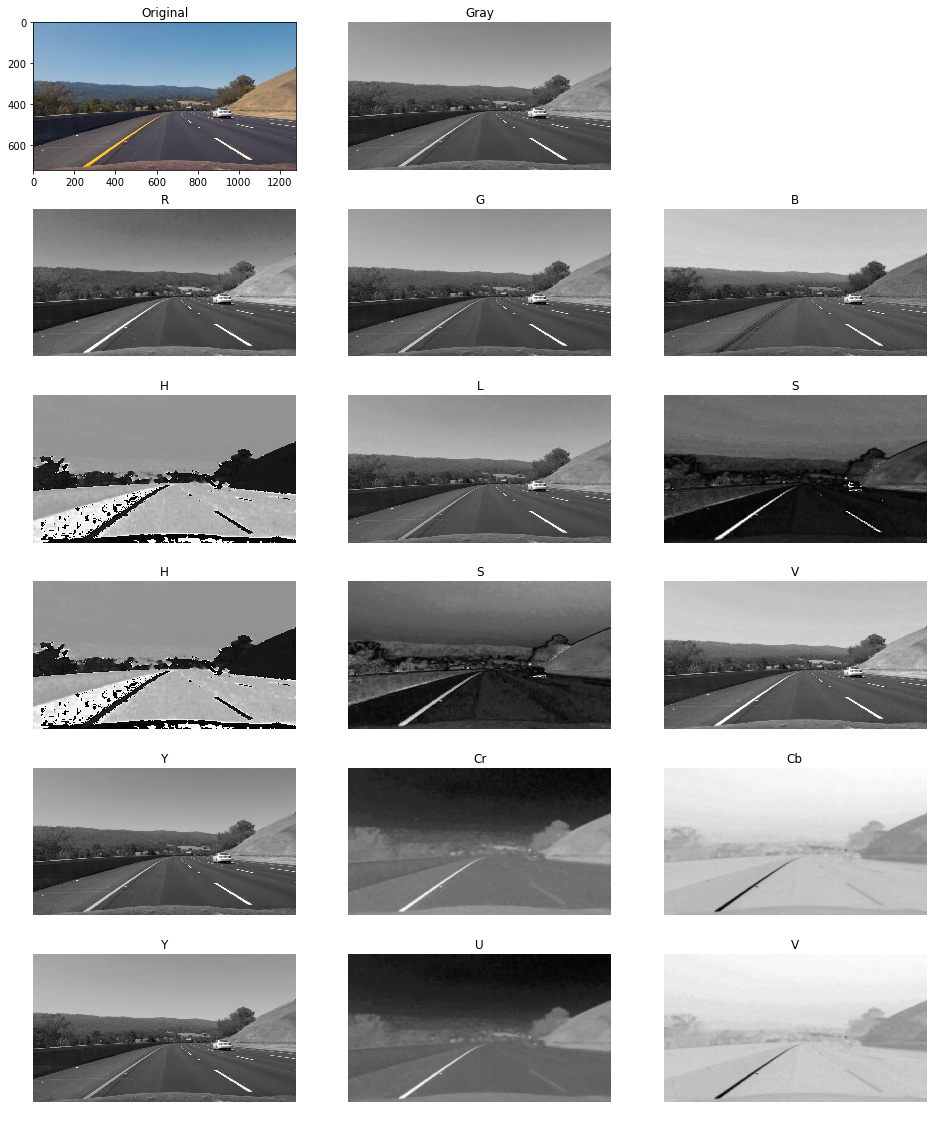

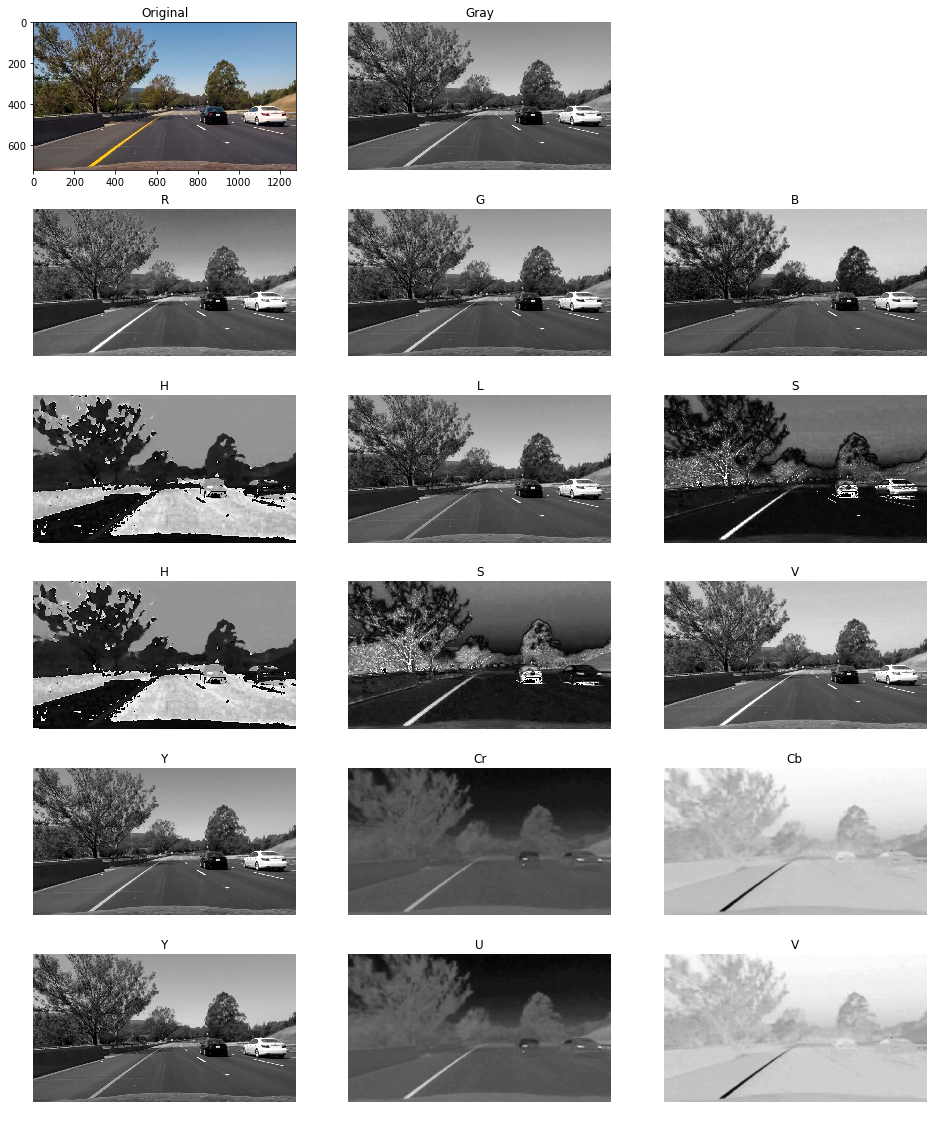

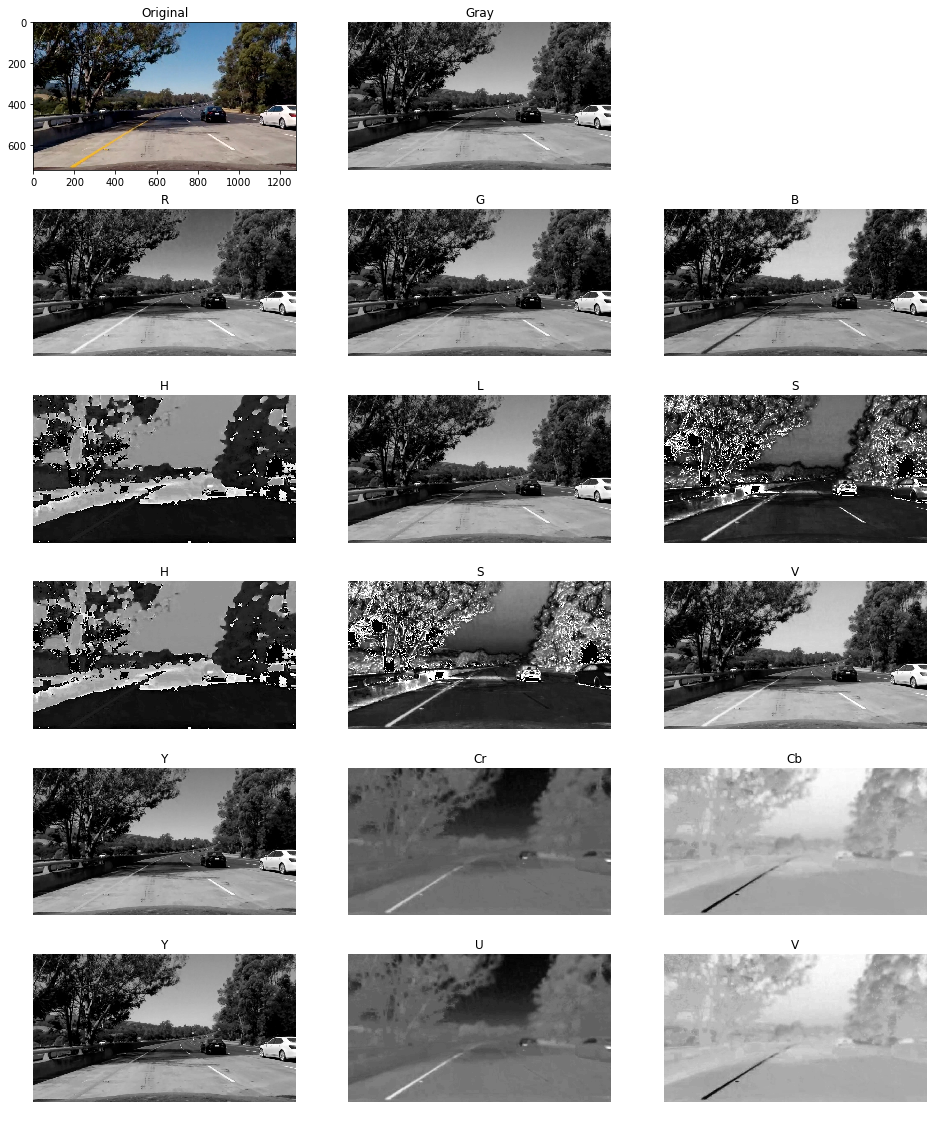

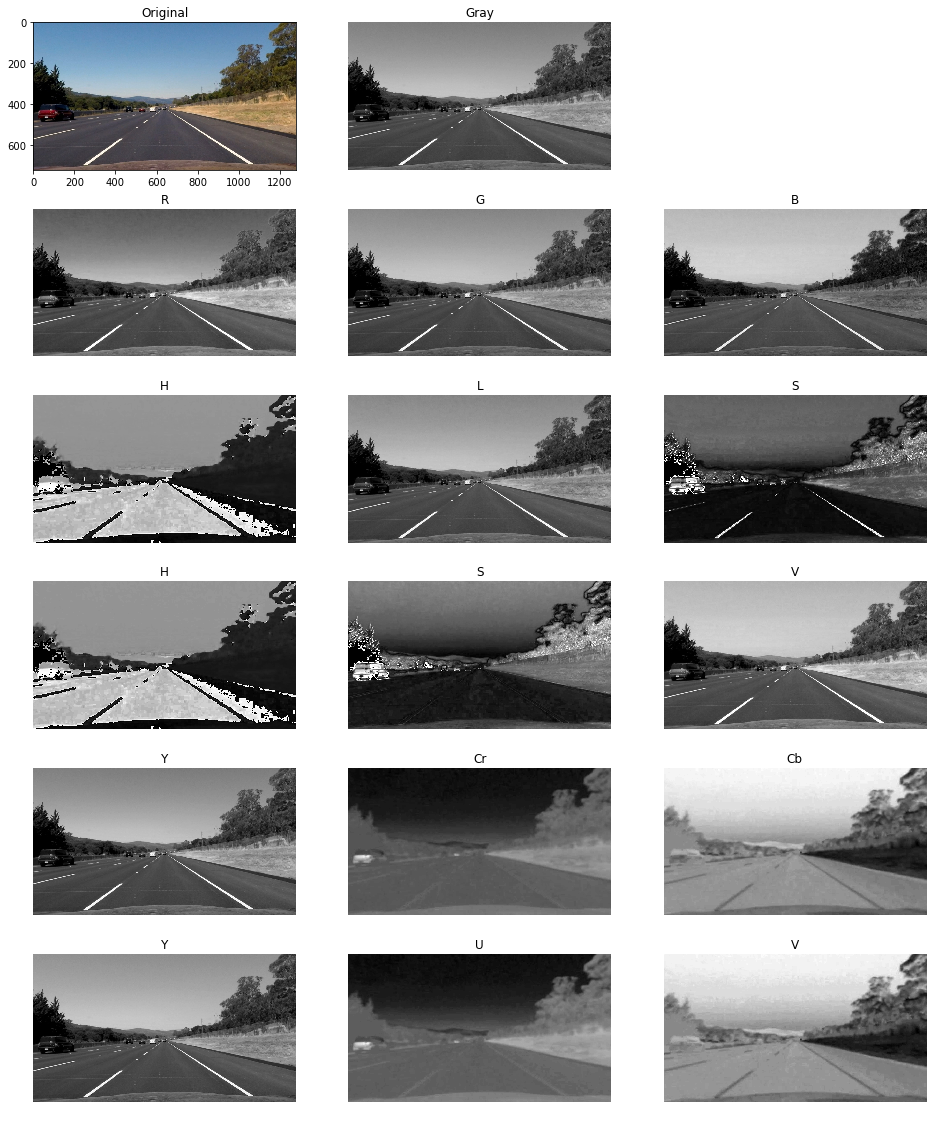

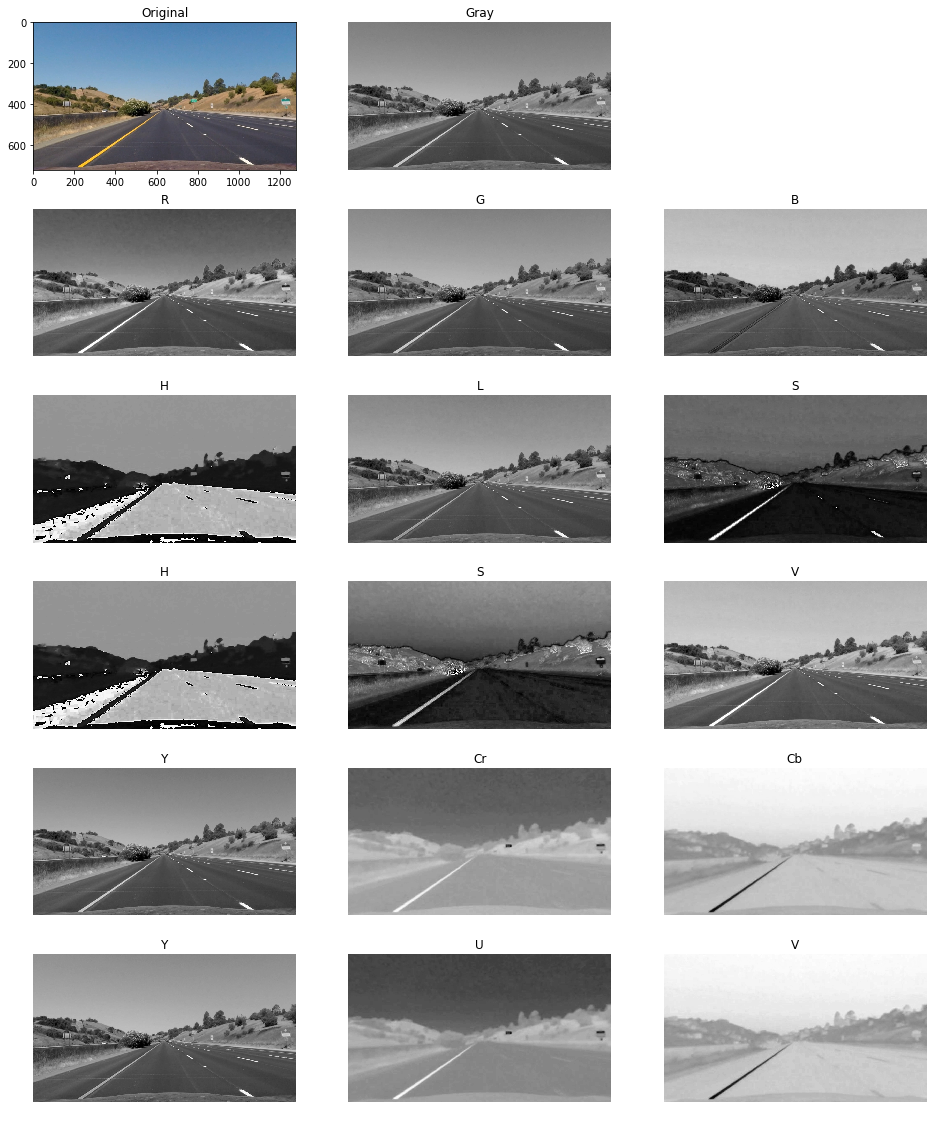

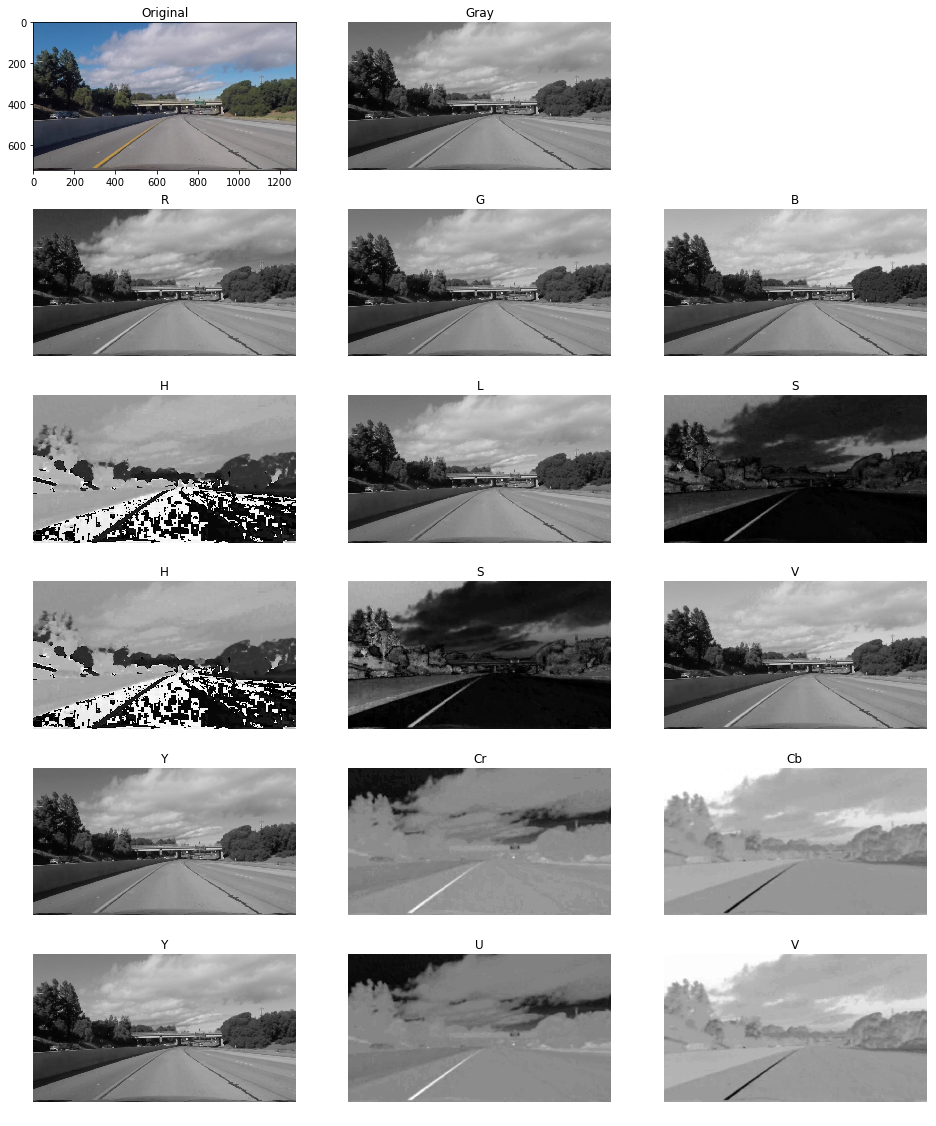

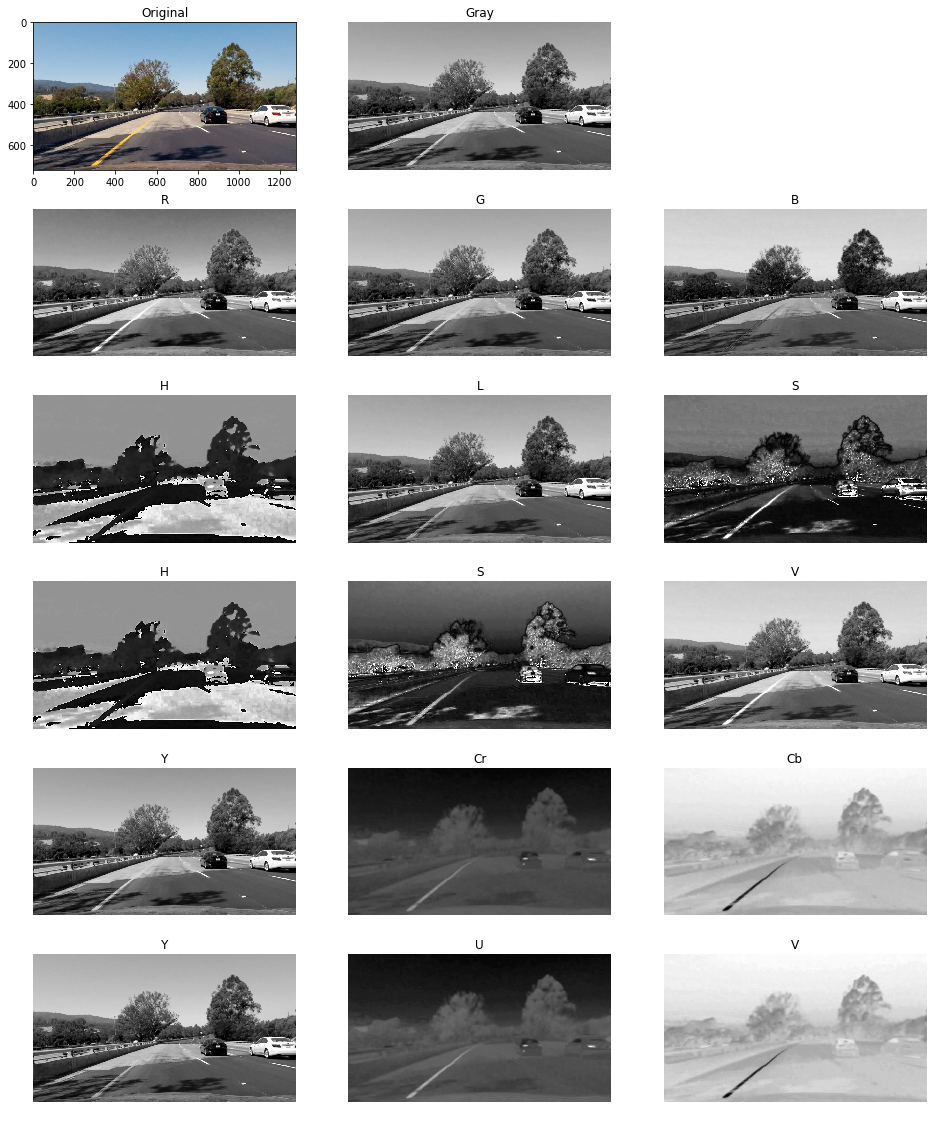

In [76]:
# Check color spaces
for index, img in enumerate(undistorted_images):
    fig = plt.figure()
    fig.set_figwidth(16)
    fig.set_figheight(20)

    rgb = img
    gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)
    hls = cv2.cvtColor(rgb, cv2.COLOR_RGB2HLS)
    hsv = cv2.cvtColor(rgb, cv2.COLOR_RGB2HSV)
    YCrCb = cv2.cvtColor(rgb, cv2.COLOR_RGB2YCrCb)
    yuv = cv2.cvtColor(rgb, cv2.COLOR_RGB2YUV)

    # Print original and gray
    ax = fig.add_subplot(6, 3, 1)
    ax.imshow(rgb)
    plt.title('Original')

    ax = fig.add_subplot(6, 3, 2)
    ax.imshow(gray, cmap='gray')
    ax.axis('off')
    plt.title('Gray')

    # Print RGB
    ax = fig.add_subplot(6, 3, 4)
    ax.imshow(rgb[:,:,0], cmap='gray')
    ax.axis('off')
    plt.title('R')

    ax = fig.add_subplot(6, 3, 5)
    ax.imshow(rgb[:,:,1], cmap='gray')
    ax.axis('off')
    plt.title('G')

    ax = fig.add_subplot(6, 3, 6)
    ax.imshow(rgb[:,:,2], cmap='gray')
    ax.axis('off')
    plt.title('B')

    # Print HLS
    ax = fig.add_subplot(6, 3, 7)
    ax.imshow(hls[:,:,0], cmap='gray')
    ax.axis('off')
    plt.title('H')

    ax = fig.add_subplot(6, 3, 8)
    ax.imshow(hls[:,:,1], cmap='gray')
    ax.axis('off')
    plt.title('L')

    ax = fig.add_subplot(6, 3, 9)
    ax.imshow(hls[:,:,2], cmap='gray')
    ax.axis('off')
    plt.title('S')

    # Print HSV
    ax = fig.add_subplot(6, 3, 10)
    ax.imshow(hsv[:,:,0], cmap='gray')
    ax.axis('off')
    plt.title('H')

    ax = fig.add_subplot(6, 3, 11)
    ax.imshow(hsv[:,:,1], cmap='gray')
    ax.axis('off')
    plt.title('S')

    ax = fig.add_subplot(6, 3, 12)
    ax.imshow(hsv[:,:,2], cmap='gray')
    ax.axis('off')
    plt.title('V')

    # Print YCrCb
    ax = fig.add_subplot(6, 3, 13)
    ax.imshow(YCrCb[:,:,0], cmap='gray')
    ax.axis('off')
    plt.title('Y')

    ax = fig.add_subplot(6, 3, 14)
    ax.imshow(YCrCb[:,:,1], cmap='gray')
    ax.axis('off')
    plt.title('Cr')

    ax = fig.add_subplot(6, 3, 15)
    ax.imshow(YCrCb[:,:,2], cmap='gray')
    ax.axis('off')
    plt.title('Cb')

    # Print YUV
    ax = fig.add_subplot(6, 3, 16)
    ax.imshow(yuv[:,:,0], cmap='gray')
    ax.axis('off')
    plt.title('Y')

    ax = fig.add_subplot(6, 3, 17)
    ax.imshow(yuv[:,:,1], cmap='gray')
    ax.axis('off')
    plt.title('U')

    ax = fig.add_subplot(6, 3, 18)
    ax.imshow(yuv[:,:,2], cmap='gray')
    ax.axis('off')
    plt.title('V')
    

In [ ]:
# Process pipeline
from threshold_image import abs_sobel_threshold, mag_threshold, dir_threshold
from lane_line_by_histogram import lane_line_by_histogram


src_top_left = [600, 450]
src_top_right = [680, 450]
src_bottom_right = [1120, 720]
src_bottom_left = [190, 720]

dest_top_left = [src_bottom_left[0] + (src_top_left[0] - src_bottom_left[0]) / 2, 0]
dest_top_right = [src_top_right[0] + (src_bottom_right[0] - src_top_right[0]) / 2, 0]
dest_bottom_right = [src_top_right[0] + (src_bottom_right[0] - src_top_right[0]) / 2, 720]
dest_bottom_left = [src_bottom_left[0] + (src_top_left[0] - src_bottom_left[0]) / 2, 720]

src_warp = np.float32([src_top_left, src_top_right, src_bottom_right, src_bottom_left])
dest_warp = np.float32([dest_top_left, dest_top_right, dest_bottom_right, dest_bottom_left])
warp_matrix = cv2.getPerspectiveTransform(src_warp, dest_warp)
warp_matrix_inverse = cv2.getPerspectiveTransform(dest_warp, src_warp)


def process_image(image):
    image_size = (image.shape[1], image.shape[0])
    # =============================================================================
    # Preprocessing pipeline
    # =============================================================================
    sobel_kernel = 9
    absolute_sobel_threshold = (20, 100)
    gradient_magnitude_threshold = (30, 100)
    gradient_direction_threshold = (0.7, 1.3)

    undist = cv2.undistort(image, mtx, dist, None, mtx)
    gray = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)

    hls = cv2.cvtColor(undist, cv2.COLOR_BGR2HLS)
    S = hls[:, :, 2]

    gradx = abs_sobel_threshold(gray, orient='x', sobel_kernel=sobel_kernel, thresh=absolute_sobel_threshold)
    grady = abs_sobel_threshold(gray, orient='y', sobel_kernel=sobel_kernel, thresh=absolute_sobel_threshold)
    mag_binary = mag_threshold(S, sobel_kernel=sobel_kernel, thresh=gradient_magnitude_threshold)
    dir_binary = dir_threshold(S, sobel_kernel=9, thresh=gradient_direction_threshold)

    # Combine all thresholding functions
    combined = np.zeros_like(gray)
    combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1

    warped = cv2.warpPerspective(combined, warp_matrix, image_size, flags=cv2.INTER_LINEAR)


    # =============================================================================
    # Lane line finding pipeline
    # =============================================================================
    # Detect lane lines based on binary image histogram
    lane_line_image = lane_line_by_histogram(warped)

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(lane_line_image, warp_matrix_inverse, image_size)
    
    # Combine the result with the original image
    result = cv2.addWeighted(undist, 1, newwarp, 0.3, 0)
    
    return np.uint8(result)



for image in undistorted_images:
    result = process_image(image)
    plt.imshow(result)

In [ ]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML


project_output = 'project_video_result.mp4'
clip1 = VideoFileClip("project_video.mp4")
project_clip = clip1.fl_image(process_image)
%time project_clip.write_videofile(project_output, audio=False)

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(project_output))